In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\anilo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
run_list = [ 'Time','Load', 'SeaTemp', 'WindSpeed', 'RunId']

In [3]:
nox_sox_features = {
    'Z01970': 'NOx',
    'Z00518': 'SOx',
    'Z02013':'Smoke Content'
}

'SeaTemp': 'SW20' , 'SW25' , 'SW28'<br>
'WindSpeed' : 'WC0' , 'WC5' , 'WC6'<br>
'Load' : 'FAL' , 'FAU',<br>
'case' : 'M0000' , 'M2503' , 'M2506' , 'M2508'<br>
'mode' : 'train' , 'test'

In [4]:
def read_csv(case="M0000",mode='train',SeaTemp='SW20',WindSpeed='WC0',Load='FAU'):
    path=f'E:\Havelsan\Datasets\{case}_{mode}_sensors.csv'
    df=pd.read_csv(path, engine='c')
    df=df[df['SeaTemp']==SeaTemp]
    df=df[df['WindSpeed']==WindSpeed]
    df=df[df['Load']==Load]
    # We create abr_sensor_list
    list1=[]
    for c in df:
        print(f'Number of {c} unique values: {df[c].nunique()}')
        if df[c].nunique()==1:
            list1.append(c)
    drop_columns=['Load', 'SeaTemp', 'WindSpeed','Linear']+list1
    df.drop(columns=drop_columns,inplace=True)
    df.dropna(inplace=True)
    return df

In [5]:
SeaTemp='SW20'
WindSpeed='WC0'
Load='FAU'

In [6]:
df = read_csv(SeaTemp=SeaTemp,WindSpeed=WindSpeed,Load=Load)

Number of Time unique values: 1475
Number of Load unique values: 1
Number of SeaTemp unique values: 1
Number of WindSpeed unique values: 1
Number of RunId unique values: 35
Number of E02005 unique values: 608
Number of E02006 unique values: 22257
Number of E02056 unique values: 2536
Number of E03760 unique values: 588
Number of G00027 unique values: 1631
Number of G00108 unique values: 1646
Number of G02011 unique values: 1644
Number of N00766 unique values: 1
Number of N02015 unique values: 447
Number of P00023 unique values: 486
Number of P01005 unique values: 1471
Number of P01302 unique values: 1165
Number of P01303 unique values: 1090
Number of P01600 unique values: 851
Number of P01602 unique values: 695
Number of P02055 unique values: 1151
Number of P02065 unique values: 547
Number of P02066 unique values: 2950
Number of P02071 unique values: 62
Number of P02072 unique values: 899
Number of Q02004 unique values: 659
Number of T00002 unique values: 58
Number of T00620 unique valu

In [7]:
for c in df:
    print(f'Number of {c} NA values: {df[c].isna().sum()}')

Number of Time NA values: 0
Number of RunId NA values: 0
Number of E02005 NA values: 0
Number of E02006 NA values: 0
Number of E02056 NA values: 0
Number of E03760 NA values: 0
Number of G00027 NA values: 0
Number of G00108 NA values: 0
Number of G02011 NA values: 0
Number of N02015 NA values: 0
Number of P00023 NA values: 0
Number of P01005 NA values: 0
Number of P01302 NA values: 0
Number of P01303 NA values: 0
Number of P01600 NA values: 0
Number of P01602 NA values: 0
Number of P02055 NA values: 0
Number of P02065 NA values: 0
Number of P02066 NA values: 0
Number of P02071 NA values: 0
Number of P02072 NA values: 0
Number of Q02004 NA values: 0
Number of T00002 NA values: 0
Number of T01010 NA values: 0
Number of T01011 NA values: 0
Number of T01350 NA values: 0
Number of T01351 NA values: 0
Number of T01601 NA values: 0
Number of T01603 NA values: 0
Number of T02014 NA values: 0
Number of T02040 NA values: 0
Number of T02041 NA values: 0
Number of T02042 NA values: 0
Number of T02

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44328 entries, 390596 to 435127
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    44328 non-null  object 
 1   RunId   44328 non-null  int64  
 2   E02005  44328 non-null  float64
 3   E02006  44328 non-null  float64
 4   E02056  44328 non-null  float64
 5   E03760  44328 non-null  float64
 6   G00027  44328 non-null  float64
 7   G00108  44328 non-null  float64
 8   G02011  44328 non-null  float64
 9   N02015  44328 non-null  float64
 10  P00023  44328 non-null  float64
 11  P01005  44328 non-null  float64
 12  P01302  44328 non-null  float64
 13  P01303  44328 non-null  float64
 14  P01600  44328 non-null  float64
 15  P01602  44328 non-null  float64
 16  P02055  44328 non-null  float64
 17  P02065  44328 non-null  float64
 18  P02066  44328 non-null  float64
 19  P02071  44328 non-null  float64
 20  P02072  44328 non-null  float64
 21  Q02004  44328 non-null  float

In [9]:
df.describe()

,RunId,E02005,E02006,E02056,E03760,G00027,G00108,G02011,N02015,P00023,...,T01603,T02014,T02040,T02041,T02042,T02044,T04600,Z00518,Z01970,Z02013
count,44328.000000,44328.000000,44328.000000,44328.000000,44328.000000,44328.000000,44328.000000,44328.000000,44328.000000,44328.000000,...,44328.000000,44328.000000,44328.000000,44328.000000,44328.000000,44328.000000,44328.000000,44328.000000,44328.000000,44328.000000
mean,18.174878,14.089953,280.958999,3129.946049,13.873812,2.628179,2.836173,2.628179,73.999750,7.789226,...,348.217101,305.408049,304.069820,-1.338429,43.427933,48.008611,220.497575,12.804344,12.849657,20.006973
std,10.088219,0.007327,23.370803,142.774994,0.010317,0.003182,0.003295,0.003191,0.007454,0.000924,...,0.205353,0.208305,0.308486,0.264278,0.428217,0.008472,0.072973,0.003892,0.039080,0.037261
min,1.000000,13.924800,240.902000,0.000000,13.611000,2.621540,2.830550,2.621540,73.810100,7.785860,...,347.675000,304.949000,303.400000,-1.854710,42.839300,47.987200,220.313000,12.794500,12.784100,19.957600
25%,9.000000,14.086900,267.652000,3133.510000,13.870800,2.626290,2.834190,2.626290,73.998000,7.788960,...,348.064000,305.229000,303.826000,-1.554380,42.980200,48.004100,220.440000,12.802600,12.826400,19.987400
50%,18.000000,14.090300,275.049000,3136.230000,13.874200,2.627320,2.835210,2.627320,74.000200,7.789480,...,348.224000,305.411000,304.059000,-1.345120,43.517250,48.007600,220.500000,12.804900,12.839300,19.999900
75%,27.000000,14.093800,285.232000,3139.290000,13.877900,2.628890,2.836820,2.628890,74.002400,7.789790,...,348.349000,305.589000,304.345000,-1.098868,43.822900,48.013300,220.550000,12.807000,12.858800,20.016100
max,35.000000,14.114000,655.885000,3153.810000,13.898900,2.653470,2.847310,2.655060,74.018300,7.790790,...,348.899000,305.872000,304.673000,-0.898010,44.126600,48.027500,220.655000,12.811900,12.989900,20.793700


In [10]:
df

,Time,RunId,E02005,E02006,E02056,E03760,G00027,G00108,G02011,N02015,...,T01603,T02014,T02040,T02041,T02042,T02044,T04600,Z00518,Z01970,Z02013
390596,00:00:00,1,14.0904,266.676,0.000,13.8741,2.62669,2.83482,2.62672,74.0005,...,348.143,305.317,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715
390597,00:00:01,1,14.0904,266.676,0.000,13.8741,2.62669,2.83482,2.62672,74.0005,...,348.143,305.317,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715
390598,00:00:02,1,13.9726,347.270,0.000,13.7390,2.65347,2.83482,2.65506,73.9091,...,348.511,305.317,303.516,-1.81976,43.7985,48.0050,220.364,12.8062,12.9007,20.7326
390599,00:00:03,1,13.9819,341.611,225.204,13.7495,2.65172,2.83517,2.65320,73.9162,...,348.499,305.333,303.529,-1.82216,43.7888,48.0049,220.367,12.8062,12.8980,20.6785
390600,00:00:04,1,13.9912,335.952,450.408,13.7600,2.64996,2.83553,2.65133,73.9233,...,348.486,305.349,303.541,-1.82455,43.7792,48.0047,220.370,12.8063,12.8954,20.6244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435123,00:20:05,35,14.0962,248.142,3130.950,13.8798,2.62351,2.83302,2.62349,74.0017,...,348.257,305.562,304.118,-1.44776,43.8632,48.0087,220.446,12.8043,12.7994,19.9814
435124,00:20:06,35,14.0959,247.351,3130.950,13.8795,2.62332,2.83285,2.62331,74.0017,...,348.233,305.563,304.121,-1.44473,43.8563,48.0087,220.451,12.8043,12.7970,19.9814
435125,00:20:07,35,14.0957,246.561,3130.950,13.8791,2.62314,2.83269,2.62313,74.0017,...,348.209,305.564,304.123,-1.44170,43.8493,48.0087,220.457,12.8043,12.7945,19.9814
435126,00:20:08,35,14.0955,245.770,3130.950,13.8788,2.62295,2.83253,2.62295,74.0017,...,348.185,305.565,304.126,-1.43867,43.8423,48.0087,220.463,12.8043,12.7921,19.9814


'target' : 'Z01970' , 'Z00518' , 'Z02013'  

In [11]:
def plot_run_simulation(target='Z02013'):
    # Convert the 'Time' column to datetime
    df['Time'] = pd.to_datetime(df['Time'])

    # Sort by 'Time'
    df.sort_values('Time', inplace=True)

    # Plot the data
    fig, ax = plt.subplots(figsize=(14, 9))
    
    # Iterate over each simulation run
    for run_id in df['RunId'].unique():
        # Create a mask for the current run
        mask = df['RunId'] == run_id

        # Plot this run's data
        plt.plot(df.loc[mask, 'Time'], df.loc[mask, target], label=f'Run {run_id}')

    plt.title(f'{target}({nox_sox_features.get(target)}) over Time for Multiple Simulations')
    # Add the initial conditions text to the top right corner
    ax.text(0.9, 0.9, f'SeaTemp: {SeaTemp}\nWindSpeed: {WindSpeed}\nLoad: {Load}', transform=ax.transAxes, ha='right', va='top', fontsize=12, color='black')

    plt.xlabel('Time')
    plt.ylabel(f'{target}({nox_sox_features.get(target)})')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

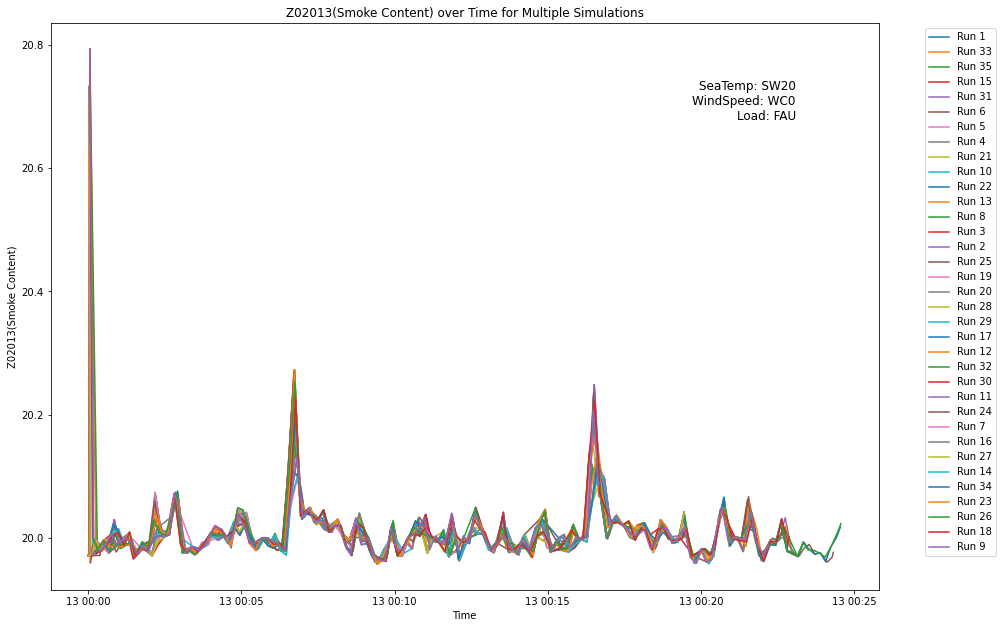

In [12]:
plot_run_simulation()

In [13]:
def plot_mean_run_simulation(target='Z02013'):
    mean_values = df.groupby('Time')['Z02013'].mean()

    # Plot the mean of 'Z02013' over time
    plt.figure(figsize=(14, 6))
    plt.plot(mean_values)
    plt.title(f'Mean of {target}({nox_sox_features.get(target)}) Over Time for All Simulation Runs')
    plt.xlabel('Time')
    plt.ylabel(f'Mean of {target}({nox_sox_features.get(target)})')
    # Add a text box with the initial conditions
    plt.text(0.9, 0.9, f'SeaTemp: {SeaTemp}\nWindSpeed: {WindSpeed}\nLoad: {Load}', 
             transform=plt.gca().transAxes, ha='right', va='top', fontsize=12, color='black')

    plt.show()

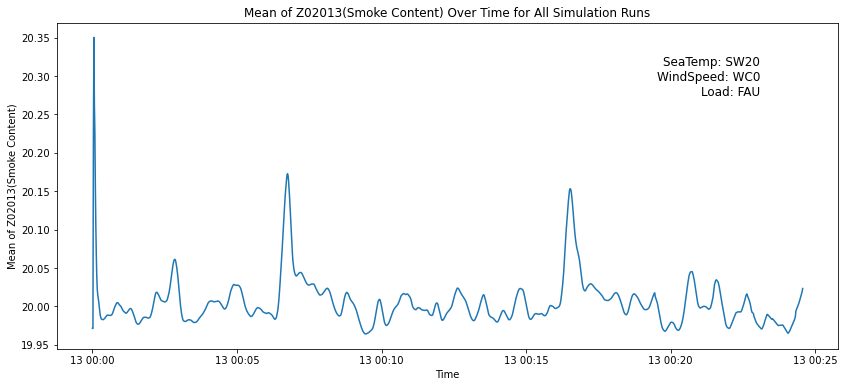

In [14]:
plot_mean_run_simulation()

In [15]:
def histogram_run_simulation(target='Z02013'):
    # Define your data
    data = df['Z02013']
    # Calculate mean and median
    mean = np.mean(data)
    median = np.median(data)
    # Create the histogram
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.hist(data, bins=30, edgecolor='black', alpha=0.7)

    # Draw lines for mean and median
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
    ax.axvline(median, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')

    # Specify the title and labels
    ax.set_title(f'Histogram of {target}({nox_sox_features.get(target)})')
    ax.set_xlabel(f'{target}({nox_sox_features.get(target)})')
    ax.set_ylabel('Frequency')

    # Add a text box with the initial conditions
    ax.text(0.9, 0.8, f'SeaTemp: {SeaTemp}\nWindSpeed: {WindSpeed}\nLoad: {Load}', 
             transform=ax.transAxes, ha='right', va='top', fontsize=12, color='black')

    # Add legend
    ax.legend(loc='upper right')

    # Display the plot
    plt.show()


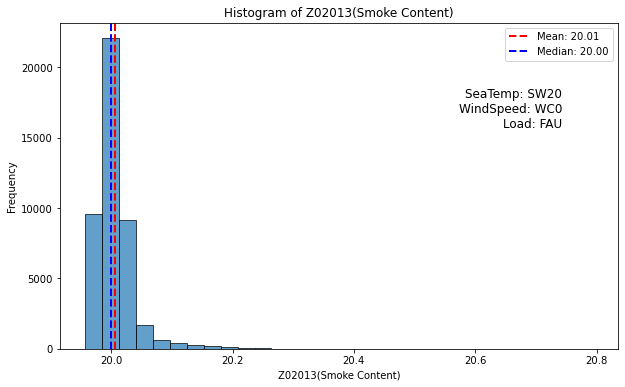

In [16]:
histogram_run_simulation()

<AxesSubplot:xlabel='Z02013'>

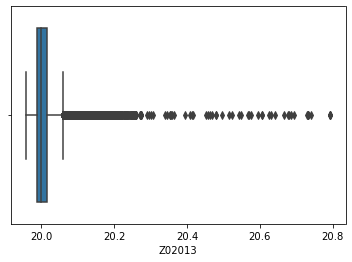

In [17]:
# Boxplot for outlier detection  in order to visually inspect the distribution of values and potentially identify any outliers
sns.boxplot(x=df['Z02013'])

In [18]:
def heat_map(target='Z02013'):
    # Calculate the correlation matrix
    corr_matrix = df.drop(columns=['RunId']).corr()

    # Pick the target column
    target_column = 'Z02013'

    # Get the correlations of the target with other columns
    target_corr = corr_matrix[target_column]

    # Print correlations
    print(target_corr)

    # If you want to visualize this correlation matrix, you can use seaborn's heatmap:
    plt.figure(figsize=(20, 18))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt=".2f")
    plt.title("Correlation matrix of all variables")
    plt.show()

In [19]:
df

,Time,RunId,E02005,E02006,E02056,E03760,G00027,G00108,G02011,N02015,...,T01603,T02014,T02040,T02041,T02042,T02044,T04600,Z00518,Z01970,Z02013
390596,2023-07-13 00:00:00,1,14.0904,266.676,0.00,13.8741,2.62669,2.83482,2.62672,74.0005,...,348.143,305.317,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715
431133,2023-07-13 00:00:00,33,14.0904,266.676,0.00,13.8741,2.62669,2.83482,2.62672,74.0005,...,348.143,305.317,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715
433918,2023-07-13 00:00:00,35,14.0904,266.676,0.00,13.8741,2.62669,2.83482,2.62672,74.0005,...,348.143,305.317,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715
408162,2023-07-13 00:00:00,15,14.0904,266.676,0.00,13.8741,2.62669,2.83482,2.62672,74.0005,...,348.143,305.317,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715
428507,2023-07-13 00:00:00,31,14.0904,266.676,0.00,13.8741,2.62669,2.83482,2.62672,74.0005,...,348.143,305.317,303.497,-1.81976,43.7985,48.0050,220.359,12.8062,12.8297,19.9715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423712,2023-07-13 00:24:32,26,14.0835,279.854,3129.97,13.8672,2.62781,2.83440,2.62782,73.9990,...,348.164,305.490,303.984,-1.49406,43.8096,47.9947,220.498,12.8108,12.8406,20.0189
433916,2023-07-13 00:24:32,34,14.0844,279.035,3129.97,13.8684,2.62767,2.83438,2.62767,73.9981,...,348.160,305.487,303.979,-1.49766,43.8172,47.9957,220.499,12.8107,12.8405,20.0154
433917,2023-07-13 00:24:33,34,14.0844,279.802,3129.97,13.8684,2.62779,2.83448,2.62779,73.9981,...,348.150,305.487,303.979,-1.49515,43.8104,47.9957,220.501,12.8107,12.8419,20.0177
423713,2023-07-13 00:24:33,26,14.0835,280.619,3129.97,13.8672,2.62794,2.83451,2.62794,73.9990,...,348.152,305.490,303.984,-1.49154,43.8096,47.9947,220.499,12.8108,12.8419,20.0212


E02005   -0.476521
E02006    0.618528
E02056   -0.063765
E03760   -0.341298
G00027    0.587821
G00108    0.302268
G02011    0.591052
N02015   -0.364828
P00023   -0.491571
P01005    0.072461
P01302   -0.102208
P01303   -0.102242
P01600    0.301581
P01602    0.232188
P02055    0.486236
P02065   -0.069044
P02066   -0.072907
P02071   -0.076145
P02072   -0.073993
Q02004   -0.469443
T00002    0.075950
T01010   -0.073190
T01011   -0.106315
T01350   -0.051415
T01351   -0.059434
T01601    0.149251
T01603    0.202617
T02014    0.023934
T02040   -0.040406
T02041   -0.068474
T02042    0.011643
T02044   -0.081609
T04600   -0.004687
Z00518   -0.099882
Z01970    0.531676
Z02013    1.000000
Name: Z02013, dtype: float64


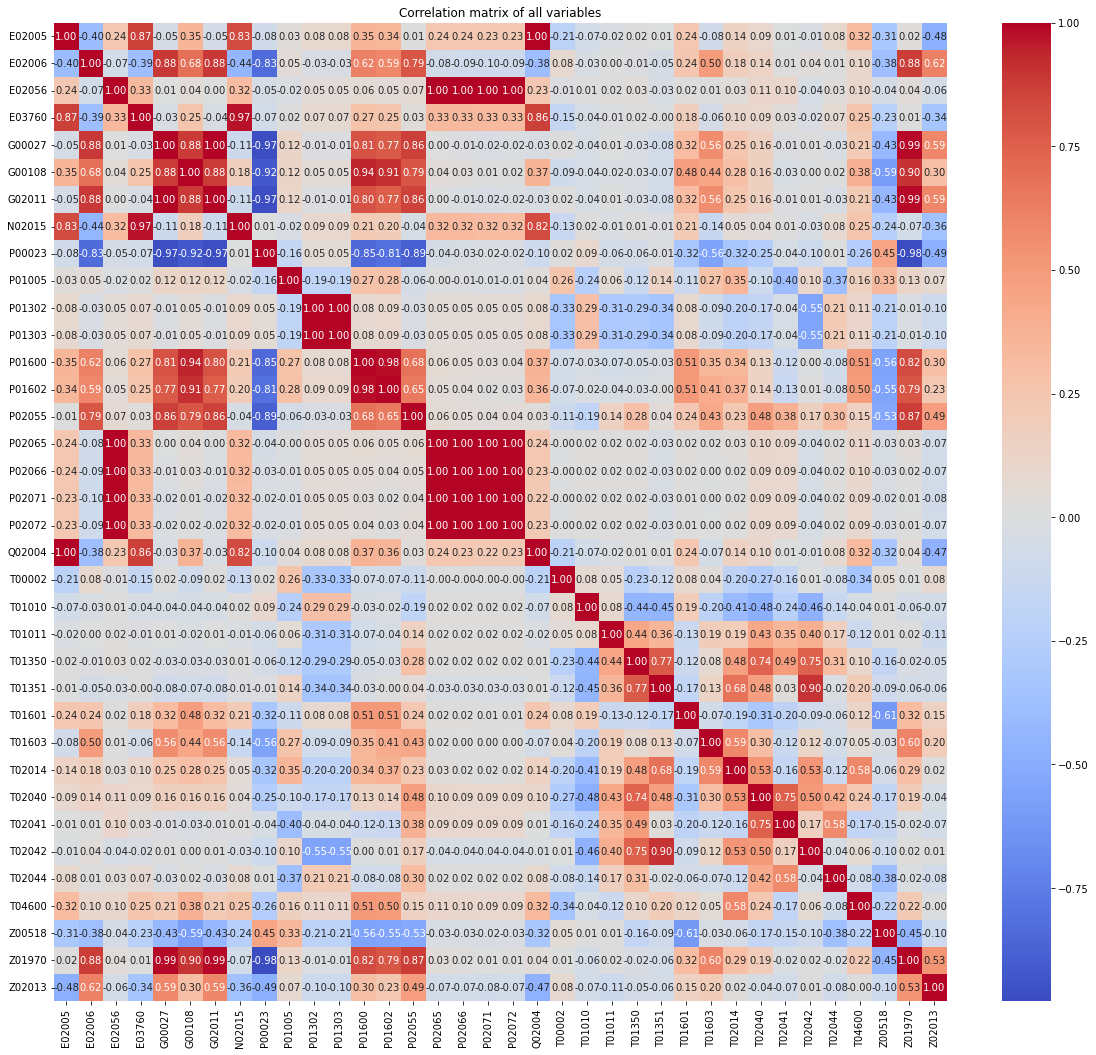

In [20]:
heat_map()

In [26]:
(df.columns)


Index(['Time', 'RunId', 'E02005', 'E02006', 'E02056', 'E03760', 'G00027',
       'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303',
       'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072',
       'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601',
       'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600',
       'Z00518', 'Z01970', 'Z02013'],
      dtype='object')